# Box Filter (Averaging Filter)

## What is a Box Filter?

A **box filter** (also called **mean filter** or **averaging filter**) is a simple linear spatial filter that replaces each pixel with the **average** of its neighborhood pixels.

### Mathematical Definition

For a 3×3 box filter:

$$g(x, y) = \frac{1}{9} \sum_{s=-1}^{1} \sum_{t=-1}^{1} f(x+s, y+t)$$

**Kernel (3×3):**
$$
\frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

### Key Characteristics

- **Type:** Linear filter (output is weighted sum)
- **Effect:** Smoothing/blurring
- **Weights:** All equal (uniform averaging)
- **Normalization:** Sum of weights = 1 (preserves brightness)

### Applications

- **Noise reduction:** Reduces random noise (Gaussian noise, salt & pepper)
- **Image smoothing:** Creates blur effect
- **Preprocessing:** Before edge detection or other operations
- **Anti-aliasing:** Reduces high-frequency artifacts

### Advantages & Disadvantages

**Advantages:**
- Simple and fast
- Easy to implement
- Reduces noise effectively

**Disadvantages:**
- Blurs edges and details
- Not edge-preserving
- Can create artifacts at boundaries

## Example 1: Manual Implementation

Implementing box filter from scratch to understand the mechanism.

Original Image with Noise:
[[  9   0  12  30   0   0  31  15   0]
 [ 10   0   0   4   0   0   0   0   6]
 [  0   0  29   0   1   0   0   2   0]
 [  7   0   0 187 237 199   0  16   0]
 [  4   0   0 203 214 203   0   0   0]
 [  0   0  21 206 164 206   0   0  12]
 [ 20  18   0   0   6  19   0   0   0]
 [  0  16  27   0  20   7   0   7  30]
 [  0  31   0  16   1   0   1   0   0]]

Filtered Image (Manual 3×3 Box Filter):
[[  6   5   9   9   7   6  10  10   4]
 [  4   6   8   8   3   3   5   6   3]
 [  3   5  24  50  69  48  24   2   3]
 [  2   4  46  96 138  94  46   2   2]
 [  2   3  68 136 202 135  69   3   4]
 [  7   7  49  90 135  90  47   1   2]
 [  8  11  32  49  69  46  26   5  10]
 [ 11  12  12   7   7   6   3   4   7]
 [  8  11  15   9   6   3   1   4   7]]


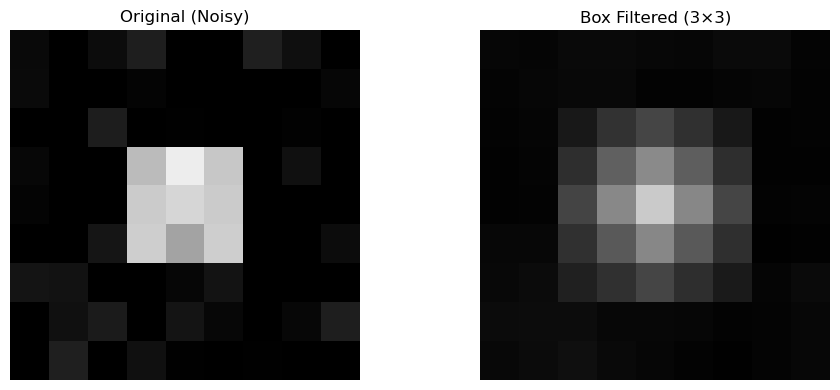


Original std: 62.59
Filtered std: 40.26 (noise reduced!)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create a simple test image with noise
np.random.seed(42)
test_image = np.zeros((9, 9), dtype=np.float32)
test_image[3:6, 3:6] = 200  # Bright square in center
# Add some noise
test_image += np.random.normal(0, 20, (9, 9))
test_image = np.clip(test_image, 0, 255).astype(np.uint8)

print("Original Image with Noise:")
print(test_image)

# Manual 3x3 box filter implementation
def manual_box_filter(image, kernel_size=3):
    """Apply box filter manually"""
    h, w = image.shape
    pad = kernel_size // 2
    # Pad the image (replicate border)
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image, dtype=np.float32)
    
    # Apply box filter
    for i in range(h):
        for j in range(w):
            # Extract neighborhood
            neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
            # Compute average
            output[i, j] = np.mean(neighborhood)
    
    return output.astype(np.uint8)

# Apply manual box filter
filtered_manual = manual_box_filter(test_image, kernel_size=3)

print("\nFiltered Image (Manual 3×3 Box Filter):")
print(filtered_manual)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(test_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original (Noisy)')
axes[0].axis('off')

axes[1].imshow(filtered_manual, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Box Filtered (3×3)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nOriginal std: {test_image.std():.2f}")
print(f"Filtered std: {filtered_manual.std():.2f} (noise reduced!)")

## OpenCV Functions for Box Filtering

OpenCV provides two main functions for box filtering:

### 1. `cv2.blur()` - Normalized Box Filter

**Syntax:**
```python
result = cv2.blur(src, ksize, dst=None, anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT)
```

**Parameters:**
- `src`: Input image (grayscale or color)
- `ksize`: Kernel size as tuple `(width, height)`, e.g., `(3, 3)`, `(5, 5)`
- `dst`: Output image (optional, same size and type as src)
- `anchor`: Anchor point (default `(-1, -1)` means center)
- `borderType`: Pixel extrapolation method at borders

**Important:** `cv2.blur()` always **normalizes** the kernel (divides by kernel area).

### 2. `cv2.boxFilter()` - Box Filter with Control

**Syntax:**
```python
result = cv2.boxFilter(src, ddepth, ksize, dst=None, anchor=(-1,-1), 
                       normalize=True, borderType=cv2.BORDER_DEFAULT)
```

**Parameters:**
- `src`: Input image
- `ddepth`: Desired depth of output image (-1 means same as input)
  - `-1`: Same as input
  - `cv2.CV_16S`: 16-bit signed
  - `cv2.CV_32F`: 32-bit float
  - `cv2.CV_64F`: 64-bit float
- `ksize`: Kernel size `(width, height)`
- `normalize`: 
  - `True`: Divide by kernel area (same as cv2.blur)
  - `False`: Just sum (no normalization)
- `anchor`: Anchor point
- `borderType`: Border handling method

**Difference:** `cv2.boxFilter()` allows non-normalized filtering and depth control.

### Border Types (borderType parameter)

- `cv2.BORDER_CONSTANT`: Pad with constant value (default 0)
- `cv2.BORDER_REPLICATE`: Repeat edge pixels (aaaaaa|abcdefgh|hhhhhhh)
- `cv2.BORDER_REFLECT`: Reflect border (fedcba|abcdefgh|hgfedcb)
- `cv2.BORDER_REFLECT_101`: Reflect without repeating edge (gfedcb|abcdefgh|gfedcba)
- `cv2.BORDER_WRAP`: Wrap around (cdefgh|abcdefgh|abcdefg)
- `cv2.BORDER_DEFAULT`: Same as `BORDER_REFLECT_101`

## Example 2: Using cv2.blur()

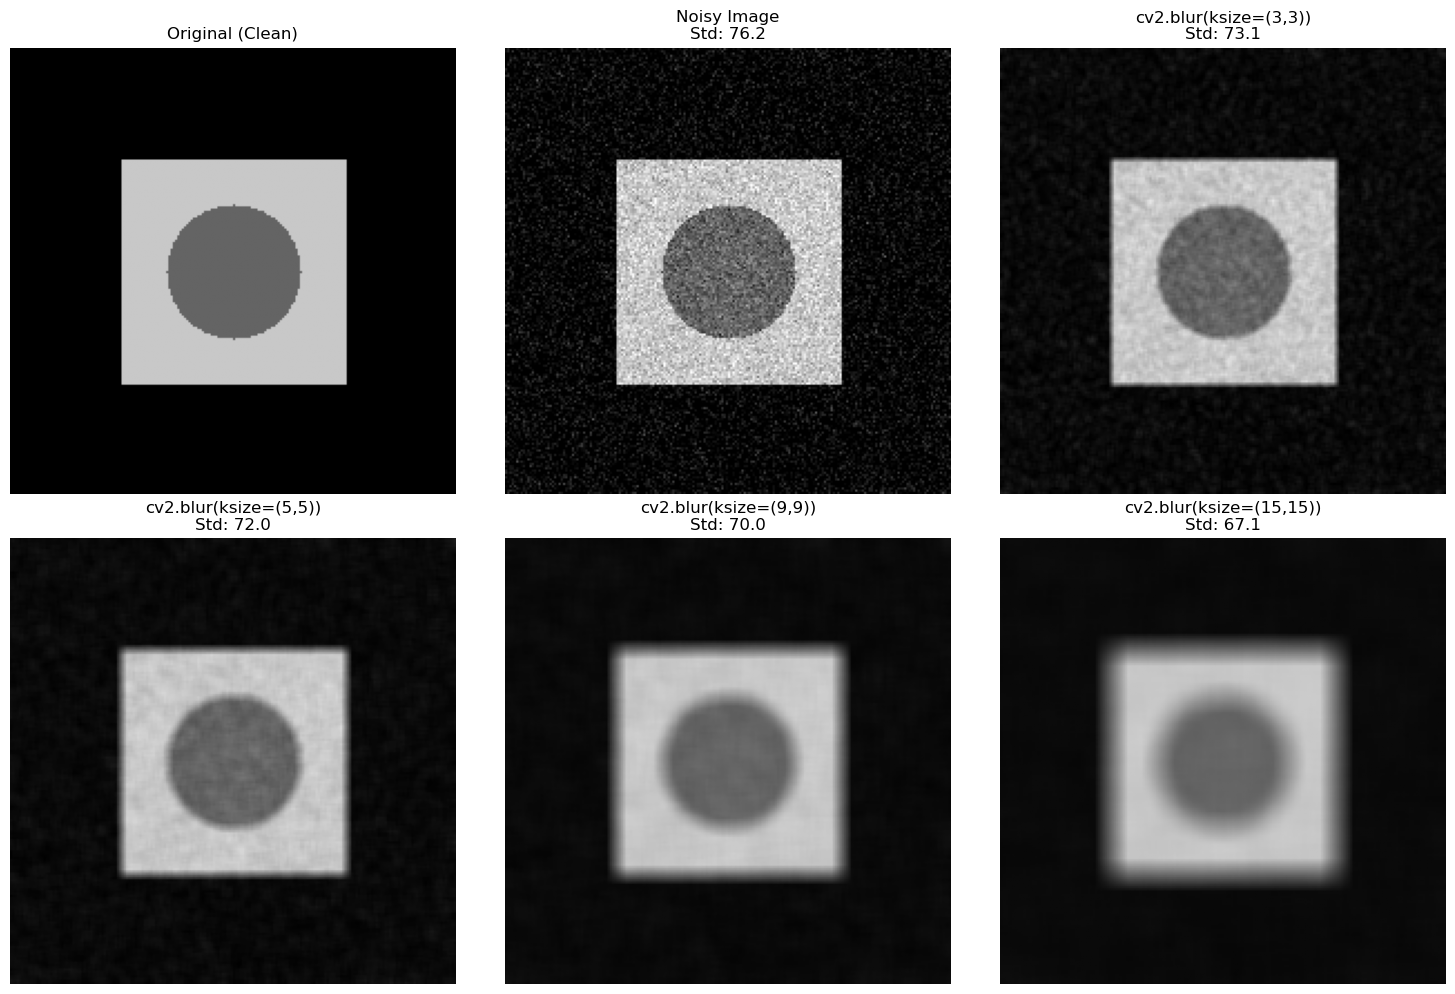

Observations:
- Larger kernel size → More smoothing
- Noise reduces significantly (std decreases)
- Edges become more blurred with larger kernels
- 3×3: Minimal blur, some noise remains
- 15×15: Heavy blur, almost no noise but details lost


In [ ]:
# Create a simple noisy image
np.random.seed(10)
simple_image = np.ones((150, 150), dtype=np.uint8) * 128  # Gray background
simple_image[40:110, 40:110] = 200  # Bright square

# Add noise
noise = np.random.normal(0, 20, simple_image.shape)
noisy_image = np.clip(simple_image + noise, 0, 255).astype(np.uint8)

# Apply cv2.blur() with different kernel sizes
blur_3x3 = cv2.blur(noisy_image, (3, 3))
blur_7x7 = cv2.blur(noisy_image, (7, 7))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(simple_image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original (Clean)')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('With Noise')
axes[0, 1].axis('off')

axes[1, 0].imshow(blur_3x3, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Blur 3×3 (Light)')
axes[1, 0].axis('off')

axes[1, 1].imshow(blur_7x7, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Blur 7×7 (Heavy)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Observations:")
print("- 3×3 kernel: reduces noise, keeps edges sharp")
print("- 7×7 kernel: smoother result, edges more blurred")

## Example 3: Using cv2.boxFilter() - Normalized vs Non-normalized

Original Image:
[[10 20 30 40 50]
 [15 25 35 45 55]
 [20 30 40 50 60]
 [25 35 45 55 65]
 [30 40 50 60 70]]
Center pixel: 40

Normalized Box Filter (normalize=True):
[[20 23 33 43 47]
 [22 25 35 45 48]
 [27 30 40 50 53]
 [32 35 45 55 58]
 [33 37 47 57 60]]
Center pixel: 40
Formula: sum / 9

Non-normalized Box Filter (normalize=False):
[[180 210 300 390 420]
 [195 225 315 405 435]
 [240 270 360 450 480]
 [285 315 405 495 525]
 [300 330 420 510 540]]
Center pixel: 360
Formula: sum only (no division)

Verification - cv2.blur() == cv2.boxFilter(normalize=True):
True


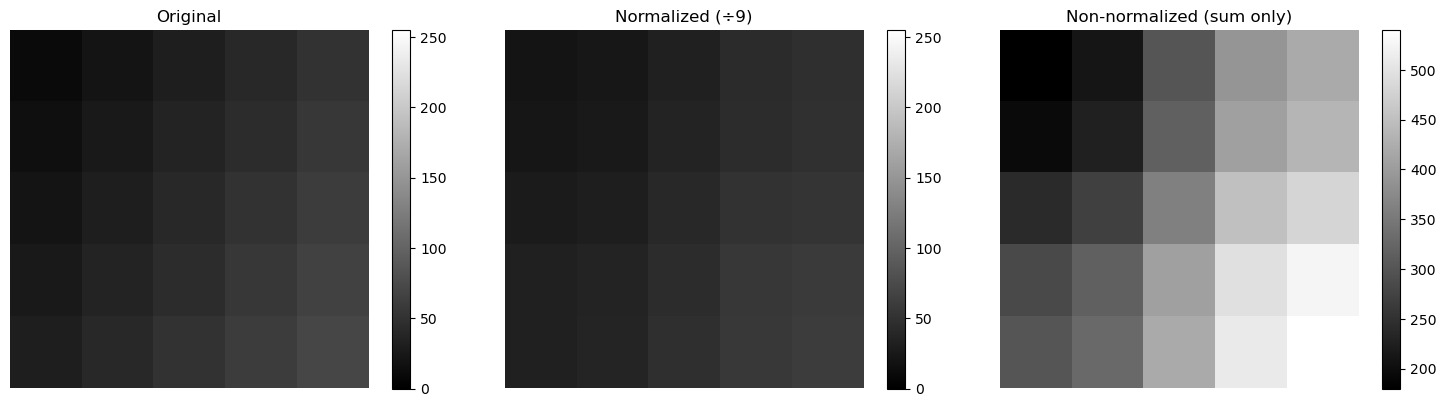


=== Manual Calculation for Center Pixel (2,2) ===
Neighborhood:
[[25 35 45]
 [30 40 50]
 [35 45 55]]
Sum: 360
Normalized (sum/9): 40.00
Non-normalized (sum): 360


In [3]:
# Create test image
test_img = np.array([
    [10, 20, 30, 40, 50],
    [15, 25, 35, 45, 55],
    [20, 30, 40, 50, 60],
    [25, 35, 45, 55, 65],
    [30, 40, 50, 60, 70]
], dtype=np.uint8)

# Apply cv2.boxFilter with normalize=True (default)
normalized = cv2.boxFilter(test_img, -1, (3, 3), normalize=True)

# Apply cv2.boxFilter with normalize=False (just sum, no division)
# Must use higher depth to avoid overflow
non_normalized = cv2.boxFilter(test_img, cv2.CV_32F, (3, 3), normalize=False)

# For comparison, blur() is same as boxFilter with normalize=True
blur_result = cv2.blur(test_img, (3, 3))

print("Original Image:")
print(test_img)
print(f"Center pixel: {test_img[2, 2]}")

print("\nNormalized Box Filter (normalize=True):")
print(normalized)
print(f"Center pixel: {normalized[2, 2]}")
print("Formula: sum / 9")

print("\nNon-normalized Box Filter (normalize=False):")
print(non_normalized.astype(int))
print(f"Center pixel: {non_normalized[2, 2]:.0f}")
print("Formula: sum only (no division)")

print("\nVerification - cv2.blur() == cv2.boxFilter(normalize=True):")
print(np.array_equal(blur_result, normalized))

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

im0 = axes[0].imshow(test_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(normalized, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Normalized (÷9)')
axes[1].axis('off')
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(non_normalized, cmap='gray')
axes[2].set_title('Non-normalized (sum only)')
axes[2].axis('off')
plt.colorbar(im2, ax=axes[2])

plt.tight_layout()
plt.show()

# Manual verification for center pixel
center_neighborhood = test_img[1:4, 1:4]
print("\n=== Manual Calculation for Center Pixel (2,2) ===")
print("Neighborhood:")
print(center_neighborhood)
print(f"Sum: {center_neighborhood.sum()}")
print(f"Normalized (sum/9): {center_neighborhood.sum() / 9:.2f}")
print(f"Non-normalized (sum): {center_neighborhood.sum()}")

## Example 4: Border Handling Comparison

In [ ]:
# Create a small test image
small_img = np.array([
    [100, 100, 100, 100, 100],
    [100, 200, 200, 200, 100],
    [100, 200, 255, 200, 100],
    [100, 200, 200, 200, 100],
    [100, 100, 100, 100, 100]
], dtype=np.uint8)

# Apply box filter with different border types
border_constant = cv2.blur(small_img, (3, 3), borderType=cv2.BORDER_CONSTANT)
border_replicate = cv2.blur(small_img, (3, 3), borderType=cv2.BORDER_REPLICATE)
border_reflect_101 = cv2.blur(small_img, (3, 3), borderType=cv2.BORDER_REFLECT_101)

# Visualize
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(small_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(border_constant, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('CONSTANT\n(pad with 0)')
axes[1].axis('off')

axes[2].imshow(border_replicate, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('REPLICATE\n(repeat edge)')
axes[2].axis('off')

axes[3].imshow(border_reflect_101, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('REFLECT_101\n(default)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print("Corner Pixel Values (Top-Left):")
print(f"Original:     {small_img[0, 0]}")
print(f"CONSTANT:     {border_constant[0, 0]} (darker)")
print(f"REPLICATE:    {border_replicate[0, 0]}")
print(f"REFLECT_101:  {border_reflect_101[0, 0]} (default)")

error: OpenCV(4.13.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filter.dispatch.cpp:130: error: (-215:Assertion failed) columnBorderType != BORDER_WRAP in function 'cv::FilterEngine::init'


## Example 5: Real-World Application - Noise Reduction

In [ ]:
# Create a simple test image with text-like pattern
np.random.seed(15)
test_img = np.ones((200, 200), dtype=np.uint8) * 180

# Add some features
test_img[50:70, 50:150] = 80   # Dark horizontal bar
test_img[80:180, 80:100] = 80  # Dark vertical bar
test_img[120:140, 120:180] = 80  # Another bar

# Add noise
noise = np.random.normal(0, 30, test_img.shape)
noisy = np.clip(test_img + noise, 0, 255).astype(np.uint8)

# Apply filters
filtered_3x3 = cv2.blur(noisy, (3, 3))
filtered_5x5 = cv2.blur(noisy, (5, 5))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(test_img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Clean Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Noisy Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(filtered_3x3, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Box Filter 3×3')
axes[1, 0].axis('off')

axes[1, 1].imshow(filtered_5x5, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Box Filter 5×5')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Results:")
print(f"Noisy image noise level (std):  {noisy.std():.1f}")
print(f"After 3×3 filter (std):         {filtered_3x3.std():.1f}")
print(f"After 5×5 filter (std):         {filtered_5x5.std():.1f}")
print("\nBox filter reduces noise but also blurs edges")

## Summary

### Key Points

**Box Filter Characteristics:**
- Simple averaging filter with uniform weights
- All kernel coefficients are equal
- Linear filter: output = weighted sum
- Normalized version: sum of weights = 1

**OpenCV Functions:**

| Function | Normalization | Depth Control | Use Case |
|----------|---------------|---------------|----------|
| `cv2.blur()` | Always normalized | Fixed | Simple blurring |
| `cv2.boxFilter()` | Optional | Flexible | Advanced control |

**Function Comparison:**
```python
# These are equivalent:
result1 = cv2.blur(img, (5, 5))
result2 = cv2.boxFilter(img, -1, (5, 5), normalize=True)

# Non-normalized version (just sum):
result3 = cv2.boxFilter(img, cv2.CV_32F, (5, 5), normalize=False)
```

**Border Handling Methods:**
- `BORDER_CONSTANT`: Pad with zeros (can darken edges)
- `BORDER_REPLICATE`: Repeat edge pixels (most common)
- `BORDER_REFLECT_101`: Mirror without repeating edge (default, recommended)
- `BORDER_WRAP`: Periodic extension (for tiling)

**Effects:**
- ✅ Reduces Gaussian noise
- ✅ Smooths images quickly
- ✅ Simple and fast
- ❌ Blurs edges and details
- ❌ Not edge-preserving
- ❌ Can create "boxy" artifacts

**Kernel Size Selection:**
- **3×3**: Light smoothing, preserves details
- **5×5**: Moderate smoothing, good balance
- **7×7 or larger**: Heavy smoothing, significant blur
- **Odd sizes preferred**: Clear center pixel

**Practical Guidelines:**
1. Start with 3×3 for minimal blur
2. Increase size if noise persists
3. Balance between noise reduction and detail loss
4. Consider Gaussian filter for better quality (next topic)
5. Use non-normalized version for special effects or integral images

**When to Use Box Filter:**
- Quick noise reduction
- Preprocessing for other operations
- Real-time applications (very fast)
- When edges don't need preservation
- Integral image calculations (non-normalized)